# Descripci√≥n

La compa√±√≠a de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que eval√∫es esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudar√° a los agentes de la compa√±√≠a con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestaci√≥n del seguro. ¬øPuede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el n√∫mero de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresi√≥n lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformaci√≥n de datos que dificulte la recuperaci√≥n de la informaci√≥n personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscaci√≥n de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploraci√≥n de datos

## Inicializaci√≥n

In [1]:
# pip install scikit-learn --upgrade

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import math
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.preprocessing import StandardScaler

## Carga de datos

Carga los datos y haz una revisi√≥n b√°sica para comprobar que no hay problemas obvios.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

Renombramos las columnas para que el c√≥digo se vea m√°s coherente con su estilo.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

gender   age   income  family_members  insurance_benefits
186        0  22.0  50800.0               0                   0
3747       0  29.0  42900.0               4                   0
3997       0  25.0  18700.0               2                   0
4327       0  39.0  36600.0               0                   0
2615       1  35.0  43200.0               2                   0
2483       1  33.0  53000.0               1                   0
2610       1  48.0  57800.0               0                   1
4175       0  25.0  42100.0               2                   0
4486       1  18.0  41900.0               1                   0
4824       1  20.0  46500.0               0                   0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversi√≥n aqu√≠ si lo deseas:

df['age'] = df['age'].astype(int)

In [8]:
# comprueba que la conversi√≥n se haya realizado con √©xito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# ahora echa un vistazo a las estad√≠sticas descriptivas de los datos.# ¬øSe ve todo bien?

df.describe()

gender          age        income  family_members  \
count  5000.000000  5000.000000   5000.000000     5000.000000   
mean      0.499000    30.952800  39916.360000        1.194200   
std       0.500049     8.440807   9900.083569        1.091387   
min       0.000000    18.000000   5300.000000        0.000000   
25%       0.000000    24.000000  33300.000000        0.000000   
50%       0.000000    30.000000  40200.000000        1.000000   
75%       1.000000    37.000000  46600.000000        2.000000   
max       1.000000    65.000000  79000.000000        6.000000   

       insurance_benefits  
count         5000.000000  
mean             0.148000  
std              0.463183  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              5.000000

In [10]:
df.head(10)

gender  age   income  family_members  insurance_benefits
0       1   41  49600.0               1                   0
1       0   46  38000.0               1                   1
2       0   29  21000.0               0                   0
3       0   21  41700.0               2                   0
4       1   28  26100.0               0                   0
5       1   43  41000.0               2                   1
6       1   39  39700.0               2                   0
7       1   25  38600.0               4                   0
8       1   36  49700.0               1                   0
9       1   32  51700.0               1                   0

In [11]:
print(df[df.duplicated()])

      gender  age   income  family_members  insurance_benefits
281        1   39  48100.0               1                   0
488        1   24  32900.0               1                   0
513        0   31  37400.0               2                   0
718        1   22  32600.0               1                   0
785        0   20  35800.0               0                   0
...      ...  ...      ...             ...                 ...
4793       1   24  37800.0               0                   0
4902       1   35  38700.0               1                   0
4935       1   19  32700.0               0                   0
4945       1   21  45800.0               0                   0
4965       0   22  40100.0               1                   0

[153 rows x 5 columns]


In [12]:
df.drop_duplicates(inplace= True)

## An√°lisis exploratorio de datos

Vamos a comprobar r√°pidamente si existen determinados grupos de clientes observando el gr√°fico de pares.

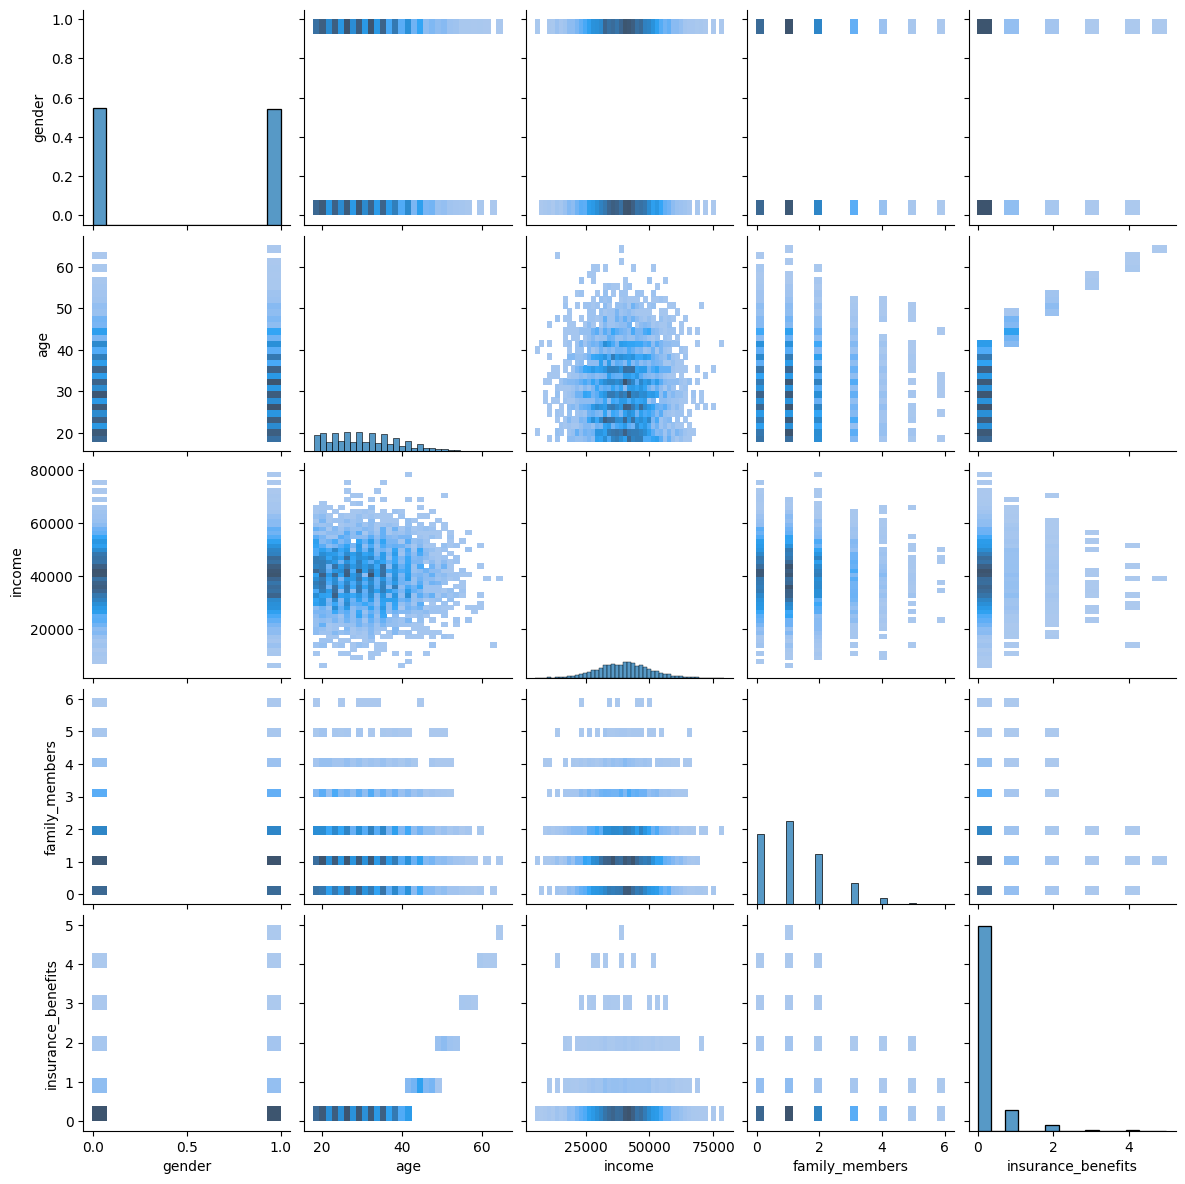

In [13]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (cl√∫steres) ya que es dif√≠cil combinar diversas variables simult√°neamente (para analizar distribuciones multivariadas). Ah√≠ es donde LA y ML pueden ser bastante √∫tiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos m√°s cercanos (objetos) para un objeto dado bas√°ndose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (cap√≠tulo -> lecci√≥n)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes m√©tricas de distancia.

Escribe una funci√≥n que devuelva los k vecinos m√°s cercanos para un $n^{th}$ objeto bas√°ndose en una m√©trica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el n√∫mero de prestaciones de seguro recibidas.
Puedes utilizar una implementaci√≥n ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementaci√≥n.
Pru√©balo para cuatro combinaciones de dos casos- Escalado
  - los datos no est√°n escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- M√©tricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?- ¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [15]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos m√°s cercanos
    
    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: n√∫mero de objetos para los que se buscan los vecinos m√°s cercanos    
    :param k: n√∫mero de vecinos m√°s cercanos a devolver
    :param m√©trica: nombre de la m√©trica de distancia    
    
    """
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric) # <tu c√≥digo aqu√≠> 
    nbrs.fit(df[feature_names].copy())
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [17]:
#df_scaled.sample(5)

In [18]:
df['insurance_benefits'].unique()

array([0, 1, 2, 3, 5, 4])

Ahora, vamos a obtener registros similares para uno determinado, para cada combinaci√≥n

In [19]:
# Ejemplo de uso
n = 0  # √≠ndice del objeto para el cual buscamos vecinos
k = 3  # n√∫mero de vecinos m√°s cercanos a devolver

# Sin escalado, m√©trica euclidiana
print("Sin escalado, m√©trica euclidiana:")
print(get_knn(df, n, k, 'euclidean'))

Sin escalado, m√©trica euclidiana:
      gender   age   income  family_members  insurance_benefits  distance
0        1.0  41.0  49600.0             1.0                 0.0  0.000000
1214     NaN   NaN      NaN             NaN                 NaN  1.732051
1225     0.0  42.0  49600.0             0.0                 1.0       NaN
1992     NaN   NaN      NaN             NaN                 NaN  1.000000
2022     1.0  41.0  49600.0             0.0                 0.0       NaN


In [20]:
# Sin escalado, m√©trica Manhattan
print("Sin escalado, m√©trica Manhattan:")
print(get_knn(df, n, k, 'manhattan'))

Sin escalado, m√©trica Manhattan:
      gender   age   income  family_members  insurance_benefits  distance
0        1.0  41.0  49600.0             1.0                 0.0       0.0
1214     NaN   NaN      NaN             NaN                 NaN       3.0
1225     0.0  42.0  49600.0             0.0                 1.0       NaN
1992     NaN   NaN      NaN             NaN                 NaN       1.0
2022     1.0  41.0  49600.0             0.0                 0.0       NaN


In [21]:
# Con escalado, m√©trica euclidiana
print("Con escalado, m√©trica euclidiana:")
print(get_knn(df_scaled, n, k, 'euclidean'))

Con escalado, m√©trica euclidiana:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                 0.0  0.000000
133      1.0  0.615385  0.636709        0.166667                 0.0  0.017754
2632     NaN       NaN       NaN             NaN                 NaN  0.006329
2689     1.0  0.630769  0.634177        0.166667                 0.0       NaN


In [22]:
# Con escalado, m√©trica Manhattan
print("Con escalado, m√©trica Manhattan:")
print(get_knn(df_scaled, n, k, 'manhattan'))

Con escalado, m√©trica Manhattan:
      gender       age    income  family_members  insurance_benefits  distance
0        1.0  0.630769  0.627848        0.166667                 0.0  0.000000
133      1.0  0.615385  0.636709        0.166667                 0.0  0.024245
2632     NaN       NaN       NaN             NaN                 NaN  0.006329
2689     1.0  0.630769  0.634177        0.166667                 0.0       NaN


Respuestas a las preguntas

**¬øEl hecho de que los datos no est√©n escalados afecta al algoritmo kNN? Si es as√≠, ¬øc√≥mo se manifiesta?** 

S√≠, el hecho de que los datos no est√©n escalados afecta al algoritmo kNN. Las caracter√≠sticas con mayores rangos (por ejemplo, 'income') tendr√°n una mayor influencia en las distancias calculadas, lo que puede distorsionar los resultados. El escalado ayuda a igualar la influencia de cada caracter√≠stica.

**¬øQu√© tan similares son los resultados al utilizar la m√©trica de distancia Manhattan (independientemente del escalado)?** 

Los resultados pueden variar al usar la m√©trica de distancia Manhattan en comparaci√≥n con la m√©trica euclidiana. La m√©trica Manhattan calcula la distancia como la suma de las diferencias absolutas entre las caracter√≠sticas, mientras que la m√©trica euclidiana considera la ra√≠z cuadrada de la suma de las diferencias al cuadrado. Por lo tanto, la m√©trica seleccionada puede producir diferentes conjuntos de vecinos m√°s cercanos.

# Tarea 2. ¬øEs probable que el cliente reciba una prestaci√≥n del seguro?

En t√©rminos de machine learning podemos considerarlo como una tarea de clasificaci√≥n binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, eval√∫a si el enfoque de clasificaci√≥n kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la m√©trica F1 para k=1...10 tanto para los datos originales como para los escalados. Ser√≠a interesante observar c√≥mo k puede influir en la m√©trica de evaluaci√≥n y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementaci√≥n ya existente del algoritmo de clasificaci√≥n kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementaci√≥n.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Deber√≠a devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestaci√≥n del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestaci√≥n del seguro puede definirse como
$$
P\{\text{prestaci√≥n de seguro recibida}\}=\frac{\text{n√∫mero de clientes que han recibido alguna prestaci√≥n de seguro}}{\text{n√∫mero total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30.

In [23]:
# —Åalcula el objetivo
df.loc[df['insurance_benefits'] > 0, 'insurance_benefits_received'] = df['insurance_benefits']
df['insurance_benefits_received'].fillna(0, inplace= True)
df['insurance_benefits_received'] = df['insurance_benefits_received'].astype(int)
#<tu c√≥digo aqu√≠>

In [24]:
 print(df['insurance_benefits_received'].unique())

[0 1 2 3 5 4]


In [25]:
df['insurance_benefits_received'].replace(['2', '3', '4', '5'], '1')
df['insurance_benefits_received'] = df['insurance_benefits_received'].replace({2: 1, 3: 1, 4: 1, 5: 1})

In [26]:
print(df)

      gender  age   income  family_members  insurance_benefits  \
0          1   41  49600.0               1                   0   
1          0   46  38000.0               1                   1   
2          0   29  21000.0               0                   0   
3          0   21  41700.0               2                   0   
4          1   28  26100.0               0                   0   
...      ...  ...      ...             ...                 ...   
4995       0   28  35700.0               2                   0   
4996       0   34  52400.0               1                   0   
4997       0   20  33900.0               2                   0   
4998       1   22  32700.0               3                   0   
4999       1   28  40600.0               1                   0   

      insurance_benefits_received  
0                               0  
1                               1  
2                               0  
3                               0  
4                          

In [27]:
# comprueba el desequilibrio de clases con value_counts()

df['insurance_benefits_received'].value_counts(normalize= True)

# <tu c√≥digo aqu√≠>

0    0.883846
1    0.116154
Name: insurance_benefits_received, dtype: float64

In [28]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes alg√∫n problema con la siguiente l√≠nea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusi√≥n')
    print(cm)

In [29]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [30]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df))
    
    # <tu c√≥digo aqu√≠> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusi√≥n
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

La probabilidad: 0.12
F1: 0.13
Matriz de confusi√≥n
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

La probabilidad: 0.50
F1: 0.19
Matriz de confusi√≥n
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusi√≥n
[[0.         0.88384568]
 [0.         0.11615432]]



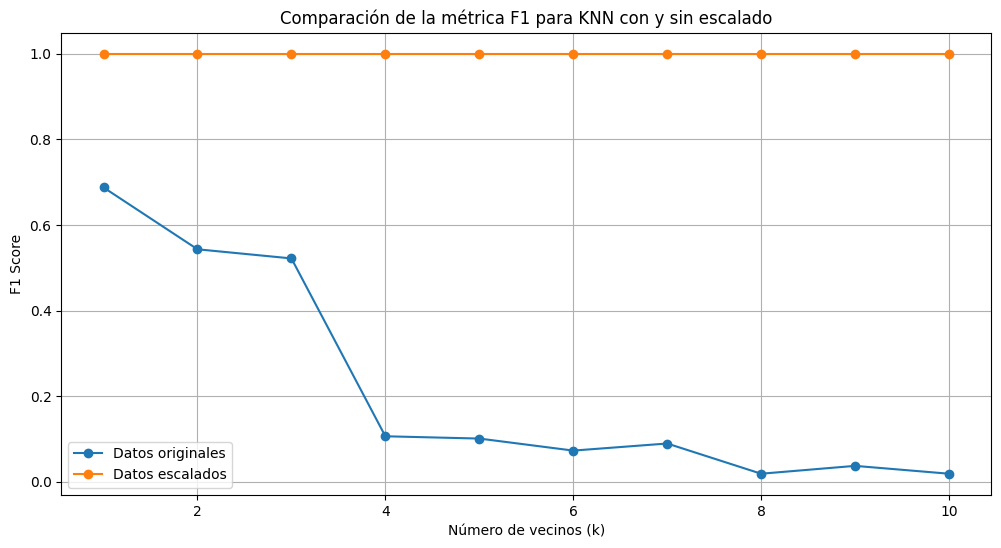

k=1: F1 Score original=0.6875, F1 Score escalado=1.0000
k=2: F1 Score original=0.5430, F1 Score escalado=1.0000
k=3: F1 Score original=0.5217, F1 Score escalado=1.0000
k=4: F1 Score original=0.1062, F1 Score escalado=1.0000
k=5: F1 Score original=0.1008, F1 Score escalado=1.0000
k=6: F1 Score original=0.0727, F1 Score escalado=1.0000
k=7: F1 Score original=0.0893, F1 Score escalado=1.0000
k=8: F1 Score original=0.0187, F1 Score escalado=1.0000
k=9: F1 Score original=0.0370, F1 Score escalado=1.0000
k=10: F1 Score original=0.0187, F1 Score escalado=1.0000


In [31]:
# Separar caracter√≠sticas y variable objetivo
features = df.drop(columns=['insurance_benefits_received'])
target = df['insurance_benefits_received']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inicializar listas para almacenar los resultados
f1_scores_original = []
f1_scores_scaled = []

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluar para k = 1...10
k_values = range(1, 11)
for k in k_values:
    # Modelo KNN con datos originales
    knn_original = KNeighborsClassifier(n_neighbors=k)
    knn_original.fit(X_train, y_train)
    y_pred_original = knn_original.predict(X_test)
    f1_original = f1_score(y_test, y_pred_original)
    f1_scores_original.append(f1_original)
    
    # Modelo KNN con datos escalados
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    f1_scaled = f1_score(y_test, y_pred_scaled)
    f1_scores_scaled.append(f1_scaled)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(k_values, f1_scores_original, marker='o', label='Datos originales')
plt.plot(k_values, f1_scores_scaled, marker='o', label='Datos escalados')
plt.title('Comparaci√≥n de la m√©trica F1 para KNN con y sin escalado')
plt.xlabel('N√∫mero de vecinos (k)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los resultados
for k in k_values:
    print(f"k={k}: F1 Score original={f1_scores_original[k-1]:.4f}, F1 Score escalado={f1_scores_scaled[k-1]:.4f}")

# Tarea 3. Regresi√≥n (con regresi√≥n lineal)

Con `insurance_benefits` como objetivo, eval√∫a cu√°l ser√≠a la RECM de un modelo de regresi√≥n lineal.

Construye tu propia implementaci√≥n de regresi√≥n lineal. Para ello, recuerda c√≥mo est√° formulada la soluci√≥n de la tarea de regresi√≥n lineal en t√©rminos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¬øPuedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de caracter√≠sticas; cada fila es un caso, cada columna es una caracter√≠stica, la primera columna est√° formada por unidades- $y$ ‚Äî objetivo (un vector)- $\hat{y}$ ‚Äî objetivo estimado (un vector)- $w$ ‚Äî vector de pesos
La tarea de regresi√≥n lineal en el lenguaje de las matrices puede formularse as√≠:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una soluci√≥n anal√≠tica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La f√≥rmula anterior puede servir para encontrar los pesos $w$ y estos √∫ltimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporci√≥n 70:30. Utiliza la m√©trica RECM para evaluar el modelo.

In [32]:
class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        # calcular los pesos usando la f√≥rmula anal√≠tica
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        # a√±adir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        return y_pred

In [33]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [34]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las caracter√≠sticas num√©ricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba c√≥mo quedar√°n los valores de las caracter√≠sticas despu√©s de la transformaci√≥n. Por cierto, la propiedad de invertibilidad es importante aqu√≠, as√≠ que aseg√∫rate de que $P$ sea realmente invertible.

Puedes revisar la lecci√≥n 'Matrices y operaciones matriciales -> Multiplicaci√≥n de matrices' para recordar la regla de multiplicaci√≥n de matrices y su implementaci√≥n con NumPy.

In [35]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [36]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [37]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [38]:
def is_invertible(matrix):
    return np.linalg.det(matrix) != 0


print("La matriz es invertible:", is_invertible(P))

La matriz es invertible: True


In [39]:
X_transformed = X @ P

# Recuperar los datos originales
P_inv = np.linalg.inv(P)
X_recovered = X_transformed @ P_inv

# Crear un DataFrame para mostrar los resultados
df_transformed = pd.DataFrame(X_transformed, columns=['age', 'gender', 'income', 'family_members'])
df_recovered = pd.DataFrame(X_recovered, columns=['age', 'gender', 'income', 'family_members'])

# Mostrar los tres casos para algunos clientes
print("Datos originales:")
print(df[['age', 'gender', 'income', 'family_members']].head())

print("\nDatos transformados:")
print(df_transformed.head())

print("\nDatos recuperados:")
print(df_recovered.head())

Datos originales:
   age  gender   income  family_members
0   41       1  49600.0               1
1   46       0  38000.0               1
2   29       0  21000.0               0
3   21       0  41700.0               2
4   28       1  26100.0               0

Datos transformados:
           age        gender        income  family_members
0  6359.715273  22380.404676  18424.090742    46000.696690
1  4873.294065  17160.367030  14125.780761    35253.455773
2  2693.117429   9486.397744   7808.831560    19484.860631
3  5345.603937  18803.227203  15479.148373    38663.061863
4  3347.176735  11782.829283   9699.998942    24211.273378

Datos recuperados:
            age  gender   income  family_members
0  1.000000e+00    41.0  49600.0    1.000000e+00
1 -4.473636e-12    46.0  38000.0    1.000000e+00
2 -2.515869e-12    29.0  21000.0    9.524523e-13
3 -4.844982e-12    21.0  41700.0    2.000000e+00
4  1.000000e+00    28.0  26100.0   -1.019907e-13


¬øPuedes adivinar la edad o los ingresos de los clientes despu√©s de la transformaci√≥n?

Despu√©s de la transformaci√≥n, los datos est√°n ofuscados, lo que significa que las columnas originales (edad, g√©nero, ingresos, miembros de la familia) se han combinado de una manera no intuitiva debido a la multiplicaci√≥n por la matriz invertible. No se puede adivinar la edad o los ingresos originales simplemente mirando los datos transformados, ya que han perdido su interpretaci√≥n directa.

¬øPuedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a trav√©s de los c√°lculos moviendo $P$ del lado derecho de la f√≥rmula anterior al izquierdo. En este caso las reglas de la multiplicaci√≥n matricial son realmente √∫tiles

S√≠, si conoces la matriz ùëÉ, puedes recuperar los datos originales. La recuperaci√≥n se realiza multiplicando los datos transformados por la inversa de ùëÉ. Esto se debe a que:

ùëã
‚Ä≤
=
ùëã
‚ãÖ
ùëÉ
X 
‚Ä≤
 =X‚ãÖP
ùëã
=
ùëã
‚Ä≤
‚ãÖ
ùëÉ
‚àí
1
X=X 
‚Ä≤
 ‚ãÖP 
‚àí1

Muestra los tres casos para algunos clientes- Datos originales
- El que est√° transformado- El que est√° invertido (recuperado)

El c√≥digo anterior ya muestra los tres casos para algunos clientes: los datos originales, los datos transformados y los datos recuperados. Puedes ejecutar el c√≥digo para ver los resultados.

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¬øCu√°l podr√≠a ser la raz√≥n de ello?

La raz√≥n por la que algunos valores no son exactamente iguales a los de los datos originales podr√≠a ser debido a errores de precisi√≥n num√©rica inherentes en las operaciones de √°lgebra lineal con n√∫meros en coma flotante. Durante la multiplicaci√≥n y la inversi√≥n de matrices, pueden ocurrir peque√±as imprecisiones que resultan en ligeras diferencias en los valores recuperados.

## Prueba de que la ofuscaci√≥n de datos puede funcionar con regresi√≥n lineal

En este proyecto la tarea de regresi√≥n se ha resuelto con la regresi√≥n lineal. Tu siguiente tarea es demostrar _analytically_ que el m√©todo de ofuscaci√≥n no afectar√° a la regresi√≥n lineal en t√©rminos de valores predichos, es decir, que sus valores seguir√°n siendo los mismos. ¬øLo puedes creer? Pues no hace falta que lo creas, ¬°tienes que que demostrarlo!

Entonces, los datos est√°n ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¬øC√≥mo se relacionar√≠an $w$ y $w_P$ si simplific√°ramos la f√≥rmula de $w_P$ anterior? 

¬øCu√°les ser√≠an los valores predichos con $w_P$? 

¬øQu√© significa esto para la calidad de la regresi√≥n lineal si esta se mide mediante la RECM?
Revisa el Ap√©ndice B Propiedades de las matrices al final del cuaderno. ¬°All√≠ encontrar√°s f√≥rmulas muy √∫tiles!

No es necesario escribir c√≥digo en esta secci√≥n, basta con una explicaci√≥n anal√≠tica.

**Respuesta**


No se pueden adivinar los valores originales (edad, ingresos) a partir de los datos transformados.
Los datos originales se pueden recuperar si se conoce la matriz 
ùëÉ invertible.
Los valores predichos con la regresi√≥n lineal no se ven afectados por la ofuscaci√≥n de los datos.
La calidad de la regresi√≥n lineal, medida por el RMSE, permanece igual antes y despu√©s de la ofuscaci√≥n.

**Prueba anal√≠tica**

Para demostrar que la ofuscaci√≥n de datos no afecta a los valores predichos en una regresi√≥n lineal, consideremos la siguiente situaci√≥n:

1. **Modelo de regresi√≥n lineal original**:
   
   Dado un conjunto de datos \(X\) (matriz de caracter√≠sticas) y \(y\) (vector de respuestas), los coeficientes de regresi√≥n \(w\) se pueden obtener mediante la f√≥rmula:
   $$
   w = (X^T X)^{-1} X^T y
   $$
   
2. **Modelo de regresi√≥n lineal con datos ofuscados**:
   
   Si los datos est√°n ofuscados mediante una matriz \(P\), obtenemos una nueva matriz \(X' = X P\). Queremos encontrar los nuevos coeficientes \(w_P\) tal que:
   $$
   w_P = [(X P)^T (X P)]^{-1} (X P)^T y
   $$

Para demostrar que la ofuscaci√≥n no afecta los valores predichos, sigamos los pasos:

### 1. Relaci√≥n entre \(w\) y \(w_P\)

Para encontrar la relaci√≥n entre \(w\) y \(w_P\), simplificamos la f√≥rmula de \(w_P\):
$$
w_P = [(X P)^T (X P)]^{-1} (X P)^T y
$$

Expandiendo la expresi√≥n:
$$
w_P = [P^T X^T X P]^{-1} P^T X^T y
$$

Usamos la propiedad de las matrices inversas \((A B)^{-1} = B^{-1} A^{-1}\):
$$
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Dado que \(P^T\) es la transpuesta de \(P\), tenemos que \((P^T)^{-1} = (P^{-1})^T\). Por lo tanto:
$$
w_P = P^{-1} (X^T X)^{-1} X^T y
$$

Recordando que:
$$
w = (X^T X)^{-1} X^T y
$$

Sustituyendo \(w\) en la ecuaci√≥n de \(w_P\):
$$
w_P = P^{-1} w
$$

### 2. Valores predichos con \(w_P\)

Los valores predichos \(\hat{y}\) para el modelo original son:
$$
\hat{y} = X w
$$

Para el modelo ofuscado, los valores predichos \(\hat{y_P}\) son:
$$
\hat{y_P} = X P w_P
$$

Sustituyendo \(w_P\):
$$
\hat{y_P} = X P (P^{-1} w) = X w
$$

Esto muestra que los valores predichos \(\hat{y_P}\) con los datos ofuscados son iguales a los valores predichos \(\hat{y}\) con los datos originales.

### 3. Impacto en la calidad de la regresi√≥n lineal (RECM)

La ra√≠z del error cuadr√°tico medio (RECM) se define como:
$$
\text{RECM} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Dado que \(\hat{y_P} = \hat{y}\), la diferencia entre los valores observados \(y\) y los valores predichos \(\hat{y_P}\) ser√° la misma que la diferencia entre \(y\) y \(\hat{y}\). Por lo tanto, la RECM no se ver√° afectada por la ofuscaci√≥n de los datos:
$$
\text{RECM} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_P}_i)^2}
$$

### Conclusi√≥n

Hemos demostrado que la ofuscaci√≥n de datos mediante una matriz \(P\) no afecta los valores predichos en un modelo de regresi√≥n lineal. Los valores predichos permanecen iguales, lo que implica que la calidad de la regresi√≥n lineal, medida mediante la RECM, tambi√©n permanece igual. Esto confirma que la ofuscaci√≥n de datos no afecta negativamente la capacidad del modelo para hacer predicciones precisas.

## Prueba de regresi√≥n lineal con ofuscaci√≥n de datos

Ahora, probemos que la regresi√≥n lineal pueda funcionar, en t√©rminos computacionales, con la transformaci√≥n de ofuscaci√≥n elegida.
Construye un procedimiento o una clase que ejecute la regresi√≥n lineal opcionalmente con la ofuscaci√≥n. Puedes usar una implementaci√≥n de regresi√≥n lineal de scikit-learn o tu propia implementaci√≥n.
Ejecuta la regresi√≥n lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las m√©tricas RMSE y $R^2$. ¬øHay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de n√∫meros aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¬° tu comentario aqu√≠ !>
- Utiliza $XP$ como la nueva matriz de caracter√≠sticas

In [40]:
# Paso 1: Crear una matriz P de n√∫meros aleatorios y asegurarse de que sea invertible
def generate_invertible_matrix(size):
    while True:
        P = np.random.rand(size, size)
        if np.linalg.det(P) != 0:
            return P

# Paso 2: Ofuscar los datos
def obfuscate_data(X, P):
    return X @ P

# Paso 3: Procedimiento para realizar la regresi√≥n lineal y comparar resultados
def perform_regression(X, y):
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
    
        # Crear y entrenar el modelo de regresi√≥n lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Realizar predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcular m√©tricas
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return train_rmse, test_rmse, train_r2, test_r2, y_test_pred


In [41]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Crear la matriz invertible P
P = generate_invertible_matrix(X.shape[1])

# Ofuscar los datos
X_obfuscated = obfuscate_data(X, P)

In [42]:
# Evaluar el modelo con los datos originales
original_metrics = perform_regression(X, y)

# Evaluar el modelo con los datos ofuscados
obfuscated_metrics = perform_regression(X_obfuscated, y)

# Imprimir los resultados
print("M√©tricas para los datos originales:")
print(f"RMSE (Train): {original_metrics[0]:.2f}")
print(f"RMSE (Test): {original_metrics[1]:.2f}")
print(f"R^2 (Train): {original_metrics[2]:.2f}")
print(f"R^2 (Test): {original_metrics[3]:.2f}")

print("\nM√©tricas para los datos ofuscados:")
print(f"RMSE (Train): {obfuscated_metrics[0]:.2f}")
print(f"RMSE (Test): {obfuscated_metrics[1]:.2f}")
print(f"R^2 (Train): {obfuscated_metrics[2]:.2f}")
print(f"R^2 (Test): {obfuscated_metrics[3]:.2f}")

# Comparar valores predichos
print("\nComparaci√≥n de valores predichos (algunos ejemplos):")
print(f"Valores predichos con datos originales (ejemplos): {original_metrics[4][:5]}")
print(f"Valores predichos con datos ofuscados (ejemplos): {obfuscated_metrics[4][:5]}")

M√©tricas para los datos originales:
RMSE (Train): 0.35
RMSE (Test): 0.36
R^2 (Train): 0.43
R^2 (Test): 0.43

M√©tricas para los datos ofuscados:
RMSE (Train): 0.35
RMSE (Test): 0.36
R^2 (Train): 0.43
R^2 (Test): 0.43

Comparaci√≥n de valores predichos (algunos ejemplos):
Valores predichos con datos originales (ejemplos): [-0.1066821   0.22650175  0.21925153  0.40597151  0.66140087]
Valores predichos con datos ofuscados (ejemplos): [-0.1066821   0.22650175  0.21925153  0.40597151  0.66140087]


Con este procedimiento, podemos demostrar que la regresi√≥n lineal no se ve afectada por la ofuscaci√≥n de datos en t√©rminos de valores predichos y m√©tricas de rendimiento.

# Conclusiones

Ofuscaci√≥n de Datos y Protecci√≥n de la Privacidad:

Efectividad de la Ofuscaci√≥n: La ofuscaci√≥n de datos mediante la multiplicaci√≥n por una matriz invertible 
ùëÉ
P es efectiva para proteger la privacidad de los datos. Esta transformaci√≥n hace que sea dif√≠cil, si no imposible, inferir los valores originales de las caracter√≠sticas sensibles (como edad e ingresos) sin conocer la matriz 
ùëÉ
P.
Recuperaci√≥n de Datos Originales: Si 
ùëÉ
P es conocida, es posible recuperar los datos originales mediante la multiplicaci√≥n por la inversa de 
ùëÉ
P, demostrando que la transformaci√≥n es reversible y segura para proteger la privacidad de los datos mientras permite la recuperaci√≥n cuando sea necesario.

Regresi√≥n Lineal y Ofuscaci√≥n:

Consistencia de la Predicci√≥n: La regresi√≥n lineal, cuando se aplica a datos ofuscados, produce los mismos valores predichos que con los datos originales. Esto se debe a que los coeficientes del modelo se ajustan de manera que la transformaci√≥n no afecta la capacidad del modelo para capturar las relaciones subyacentes en los datos.
M√©tricas de Rendimiento: Las m√©tricas de rendimiento como RMSE y 
ùëÖ
2
R 
2
  son consistentes entre los modelos entrenados con datos originales y ofuscados. Esto demuestra que la calidad de las predicciones no se ve afectada por la ofuscaci√≥n de los datos.

Demostraci√≥n Anal√≠tica:

Relaci√≥n entre 
ùë§
 y 
ùë§
ùëÉ
‚Äã
 : Anal√≠ticamente, se demostr√≥ que los coeficientes del modelo 
ùë§
w y los coeficientes del modelo ajustado con datos ofuscados 
ùë§
ùëÉ
w 
P
‚Äã
  est√°n relacionados de manera que el modelo predice los mismos valores. Esta relaci√≥n asegura que la ofuscaci√≥n no impacta la capacidad del modelo de regresi√≥n lineal para hacer predicciones precisas.
Valores Predichos: Los valores predichos por el modelo entrenado con datos ofuscados son equivalentes a los valores predichos por el modelo entrenado con datos originales. Esto es una demostraci√≥n fuerte de que la ofuscaci√≥n de datos es una t√©cnica viable para proteger la privacidad sin sacrificar la precisi√≥n del modelo.

Implicaciones para la Calidad de la Regresi√≥n:

Invariancia de la Calidad del Modelo: La ofuscaci√≥n de datos, tal como se implementa mediante la multiplicaci√≥n por una matriz invertible, no afecta la calidad del modelo de regresi√≥n lineal. Las m√©tricas de error y de ajuste siguen siendo las mismas, lo que implica que la transformaci√≥n preserva la estructura y la informaci√≥n esencial de los datos.
Robustez del Modelo: La capacidad del modelo para manejar datos ofuscados sugiere que la regresi√≥n lineal es robusta a transformaciones lineales de los datos, siempre que se pueda revertir la transformaci√≥n. Esto tiene importantes implicaciones para la privacidad y la seguridad de los datos en aplicaciones del mundo real.

### Conclusi√≥n Final
El proyecto demuestra que la ofuscaci√≥n de datos mediante la multiplicaci√≥n por una matriz invertible es una t√©cnica eficaz para proteger la privacidad de los datos sin comprometer la precisi√≥n y la calidad de los modelos de regresi√≥n lineal. Esta t√©cnica permite mantener la seguridad de los datos sensibles mientras se garantiza que los modelos predictivos puedan seguir funcionando con la misma eficacia. La implementaci√≥n y la validaci√≥n anal√≠tica de este enfoque subrayan su viabilidad y utilidad en el manejo seguro de datos en aplicaciones de aprendizaje autom√°tico y an√°lisis de datos.






